In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import shapiro
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

def plot_for_every_column(model, columns):
    for c in columns:
        #fig = plt.figure(figsize=(12,8))
        #fig = sm.graphics.plot_regress_exog(model, c, fig=fig)
        fig = sm.graphics.plot_ccpr(model, c)
        fig.tight_layout(pad=1.0)
        
def plot_ccpr(model, cols):
    plotn = 0
    rows = 4
    columns = 4
    fig, ax_array = plt.subplots(rows, columns,squeeze=False)
    fig.set_figheight(20)
    fig.set_figwidth(25)
    for i,ax_row in enumerate(ax_array):
        for j,axes in enumerate(ax_row):
            axes.set_title(cols[plotn])
            sm.graphics.plot_ccpr(model, cols[plotn], ax = axes)
            plotn = plotn + 1
    plt.show()
    
def plot_model(df, model):
    influence = model.get_influence()

    df['resid'] = model.resid
    df['fittedvalues'] = model.fittedvalues
    df['resid_std'] = model.resid_pearson
    df['leverage'] = influence.hat_matrix_diag

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
    plt.style.use('seaborn')

    # Residual against fitted values.
    df.plot.scatter(
        x='fittedvalues', y='resid', ax=axes[0, 0]
    )
    axes[0, 0].axhline(y=0, color='grey', linestyle='dashed')
    axes[0, 0].set_xlabel('Fitted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted')

    # qqplot
    sm.qqplot(
        df['resid'], dist=stats.t, fit=True, line='45',
        ax=axes[0, 1], c='#4C72B0'
    )
    axes[0, 1].set_title('Normal Q-Q')

    # The scale-location plot.
    df.plot.scatter(
        x='fittedvalues', y='resid_std', ax=axes[1, 0]
    )
    axes[1, 0].axhline(y=0, color='grey', linestyle='dashed')
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('Sqrt(|standardized residuals|)')
    axes[1, 0].set_title('Scale-Location')

    # Standardized residuals vs. leverage
    df.plot.scatter(
        x='leverage', y='resid_std', ax=axes[1, 1]
    )
    axes[1, 1].axhline(y=0, color='grey', linestyle='dashed')
    axes[1, 1].set_xlabel('Leverage')
    axes[1, 1].set_ylabel('Sqrt(|standardized residuals|)')
    axes[1, 1].set_title('Residuals vs Leverage')

    plt.tight_layout()
    plt.show()

In [2]:
d = pd.read_csv("life.csv")
d = d.interpolate(method = 'zero')
d["gdp_per_capita"] = d["GDP"]
d.columns=d.columns.str.lower().str.replace(' ','')
d.columns=d.columns.str.lower().str.replace('-','')
d.columns=d.columns.str.lower().str.replace('/','')
d.columns=d.columns.str.lower().str.replace('_','')
d = d[d.year == max(d.year)]
d = d.drop(["country", "year","status", "gdp", "population", "percentageexpenditure"], axis = 1)

f = "lifeexpectancy~" + "+".join(d.columns[1:])

### Not normalised data

In [3]:
model = ols(formula = f, data=d).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     77.73
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.46e-68
Time:                        17:38:13   Log-Likelihood:                -446.78
No. Observations:                 183   AIC:                             927.6
Df Residuals:                     166   BIC:                             982.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       52.0819      2.186     23.827      0.000      47.766      56.397
adultmortality                  -0.0230      0.003     -6.648      0.000      -0.030      -0.016
infantdeaths                     0.0600      0.032      1.872      0.063      -0.003       0.123
alcohol                          0.0040      0.058      0.069      0.945      -0.110       0.118
hepatitisb                    8.037e-05      0.018      0.005      0.996      -0.035       0.035
measles                       1.384e-06    5.5e-05      0.025      0.980      -0.000       0.000
bmi                             -0.0034      0.014     -0.245      0.807      -0.031       0.024
underfivedeaths                 -0.0486      0.023     -2.120      0.035      -0.094      -0.003
polio                            0.0116      0.013      0.909      0.365      -0.014       0.037
totalexpenditure                 0.0198      0.097      0.205      0.838      -0.171       0.210
diphtheria                       0.0288      0.023      1.242      0.216      -0.017       0.075
hivaids                         -0.5470      0.225     -2.434      0.016      -0.991      -0.103
thinness119years                -0.1643      0.244     -0.673      0.502      -0.646       0.317
thinness59years                  0.0358      0.238      0.151      0.880      -0.433       0.505
incomecompositionofresources    26.8210      4.195      6.394      0.000      18.539      35.103
schooling                        0.1693      0.185      0.916      0.361      -0.196       0.534
gdppercapita                 -6.022e-06    2.2e-05     -0.273      0.785   -4.95e-05    3.75e-05
==============================================================================
Omnibus:                       12.972   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.430
Skew:                          -0.395   Prob(JB):                     3.66e-05
Kurtosis:                       4.434   Cond. No.                     2.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

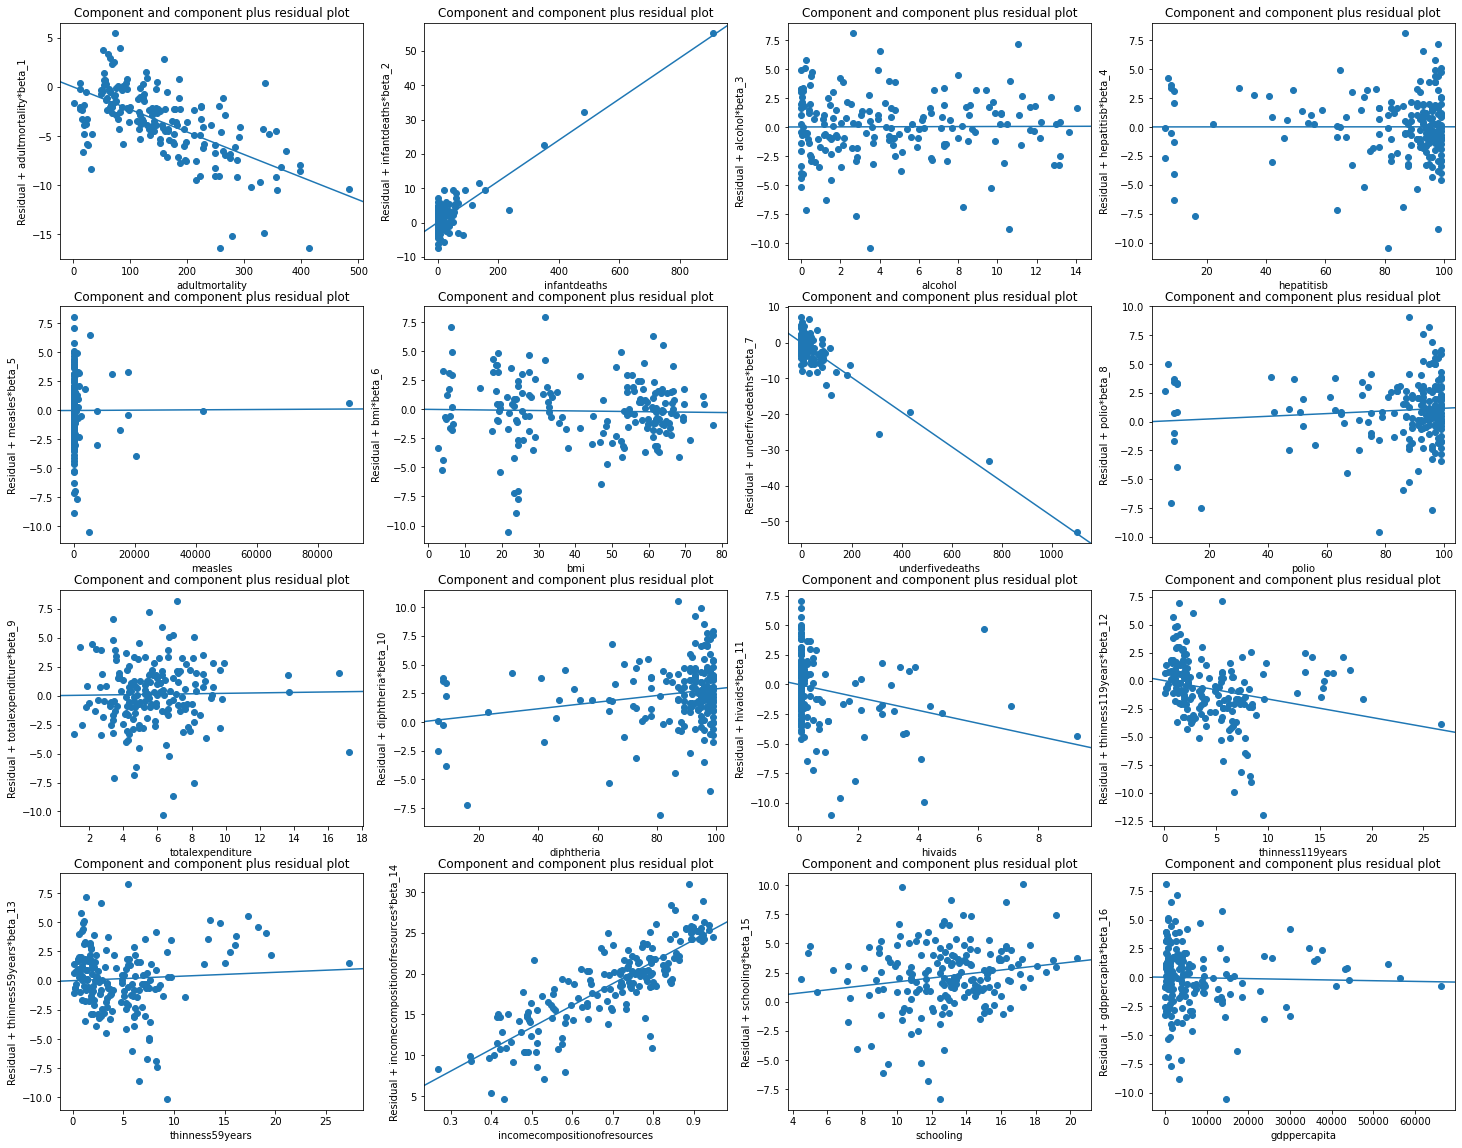

In [4]:
plot_ccpr(model, d.columns[1:])

### Normalised data

In [5]:
l = d.copy()
l.gdppercapita = np.log(l.gdppercapita)
l.infantdeaths = np.log(l.infantdeaths + 1)
l.measles = np.log(l.measles + 1)
l.totalexpenditure = np.log(l.totalexpenditure + 1)
l.underfivedeaths = np.log(l.underfivedeaths + 1)

model = ols(formula = f, data=l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     77.13
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           4.30e-68
Time:                        17:38:15   Log-Likelihood:                -447.41
No. Observations:                 183   AIC:                             928.8
Df Residuals:                     166   BIC:                             983.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       53.4728      2.551     20.965      0.000      48.437      58.509
adultmortality                  -0.0223      0.004     -6.349      0.000      -0.029      -0.015
infantdeaths                     1.5084      1.618      0.932      0.352      -1.686       4.702
alcohol                          0.0047      0.059      0.081      0.936      -0.111       0.120
hepatitisb                      -0.0015      0.018     -0.085      0.932      -0.037       0.034
measles                          0.0214      0.094      0.228      0.820      -0.164       0.207
bmi                             -0.0021      0.014     -0.153      0.878      -0.030       0.025
underfivedeaths                 -1.6895      1.562     -1.082      0.281      -4.773       1.394
polio                            0.0114      0.013      0.883      0.378      -0.014       0.037
totalexpenditure                 0.1796      0.664      0.271      0.787      -1.132       1.491
diphtheria                       0.0299      0.024      1.273      0.205      -0.016       0.076
hivaids                         -0.5791      0.228     -2.535      0.012      -1.030      -0.128
thinness119years                -0.1475      0.245     -0.602      0.548      -0.631       0.336
thinness59years                  0.0520      0.238      0.218      0.828      -0.419       0.523
incomecompositionofresources    28.4601      4.344      6.551      0.000      19.883      37.037
schooling                        0.1392      0.185      0.752      0.453      -0.227       0.505
gdppercapita                    -0.2889      0.164     -1.766      0.079      -0.612       0.034
==============================================================================
Omnibus:                       10.449   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               15.669
Skew:                          -0.326   Prob(JB):                     0.000396
Kurtosis:                       4.277   Cond. No.                     4.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

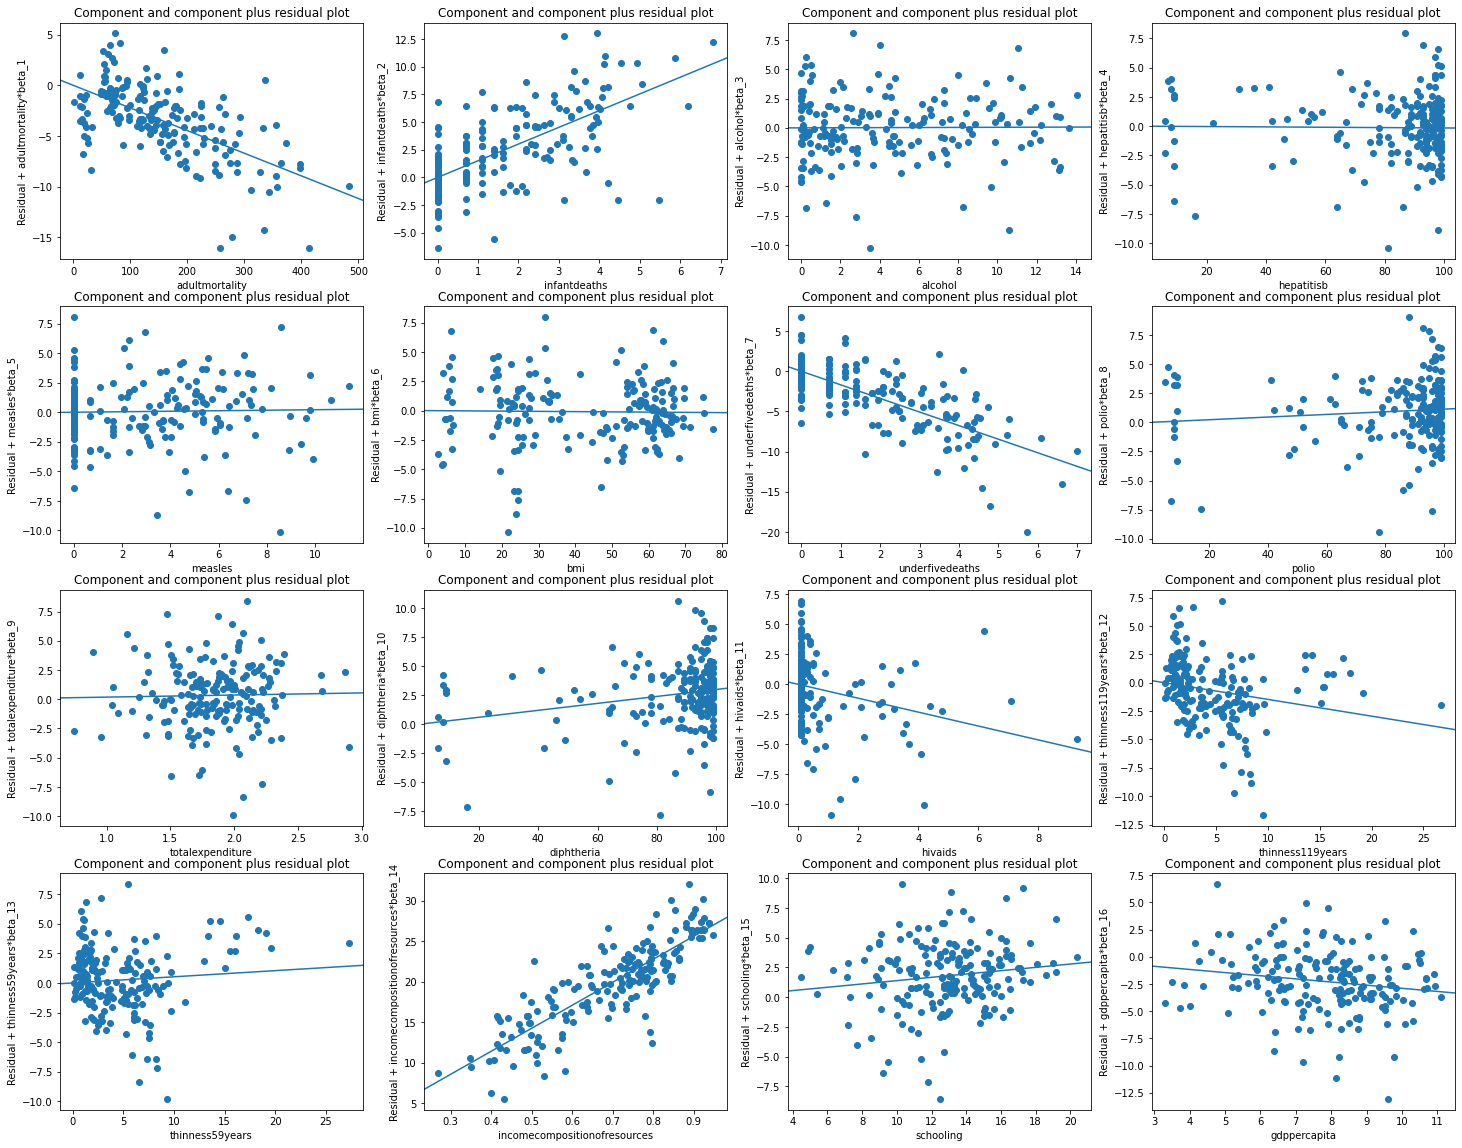

In [6]:
plot_ccpr(model, l.columns[1:])

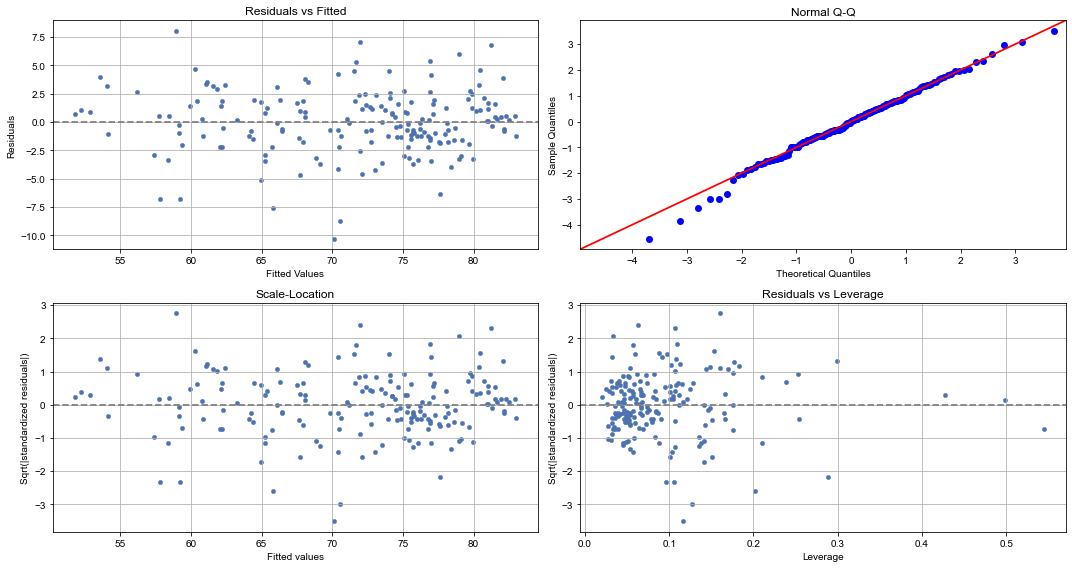

In [7]:
plot_model(l, model)

In [8]:
influence = model.get_influence()
df = influence.summary_frame()
df.columns

Index(['dfb_Intercept', 'dfb_adultmortality', 'dfb_infantdeaths',
       'dfb_alcohol', 'dfb_hepatitisb', 'dfb_measles', 'dfb_bmi',
       'dfb_underfivedeaths', 'dfb_polio', 'dfb_totalexpenditure',
       'dfb_diphtheria', 'dfb_hivaids', 'dfb_thinness119years',
       'dfb_thinness59years', 'dfb_incomecompositionofresources',
       'dfb_schooling', 'dfb_gdppercapita', 'cooks_d', 'standard_resid',
       'hat_diag', 'dffits_internal', 'student_resid', 'dffits'],
      dtype='object')

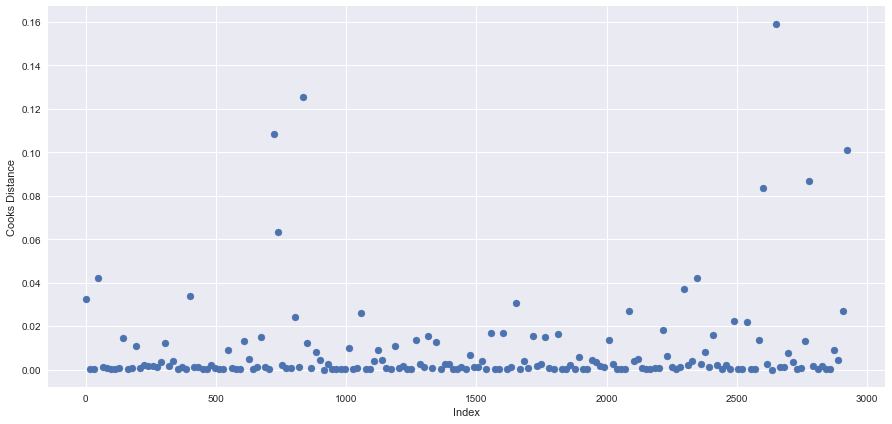

In [9]:
plt.figure(figsize=(15, 7))
plt.scatter(df.index, df.cooks_d)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')
plt.show()

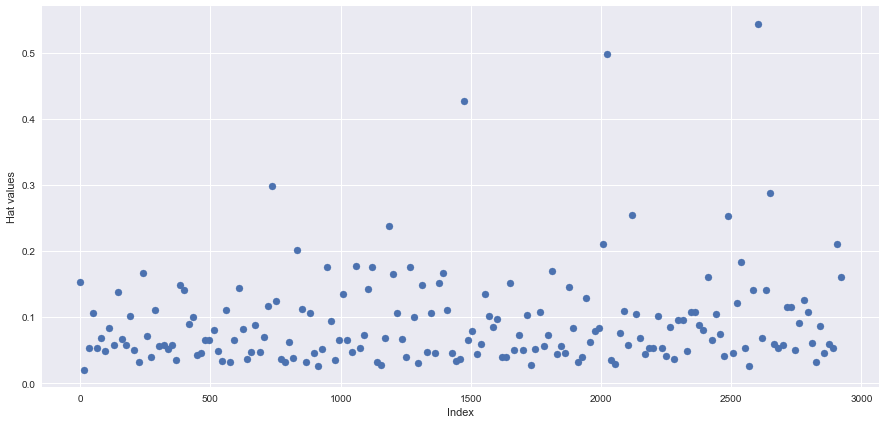

In [10]:
plt.figure(figsize=(15, 7))
plt.scatter(df.index, df.hat_diag)
plt.xlabel('Index')
plt.ylabel('Hat values')
plt.show()

In [11]:
shapiro(model.resid)

ShapiroResult(statistic=0.9820293188095093, pvalue=0.01866692304611206)

In [12]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 28.88448101814908),
 ('p-value', 0.024726788200103104),
 ('f-value', 1.9444926282770234),
 ('f p-value', 0.01967237680819225)]

In [13]:
table = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame
print(table)

                                   sum_sq     df          F        PR(>F)
adultmortality                 345.854928    1.0  40.314798  1.989062e-09
infantdeaths                     7.458541    1.0   0.869410  3.524730e-01
alcohol                          0.055875    1.0   0.006513  9.357750e-01
hepatitisb                       0.061764    1.0   0.007200  9.324828e-01
measles                          0.445816    1.0   0.051967  8.199560e-01
bmi                              0.201805    1.0   0.023524  8.782897e-01
underfivedeaths                 10.036221    1.0   1.169878  2.809950e-01
polio                            6.692505    1.0   0.780116  3.783830e-01
totalexpenditure                 0.627770    1.0   0.073176  7.871029e-01
diphtheria                      13.909943    1.0   1.621421  2.046739e-01
hivaids                         55.140208    1.0   6.427453  1.216106e-02
thinness119years                 3.114017    1.0   0.362987  5.476739e-01
thinness59years                  0.408